In [1]:
!conda create -p env -y

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\hp\Desktop\DLCV\DLCV\mnist\env



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
#
# To activate this environment, use
#
#     $ conda activate c:\Users\hp\Desktop\DLCV\DLCV\mnist\env
#
# To deactivate an active environment, use
#
#     $ conda deactivate





==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0




In [2]:
!conda activate c:\Users\hp\Desktop\DLCV\mnist\env

In [3]:
!pip install tensorflow

In [4]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense,Flatten

In [5]:
data=keras.datasets.mnist.load_data()

In [6]:
len(data)

2

In [7]:
(x_train,y_train),(x_test,y_test)=data

In [8]:
x_train.shape

(60000, 28, 28)

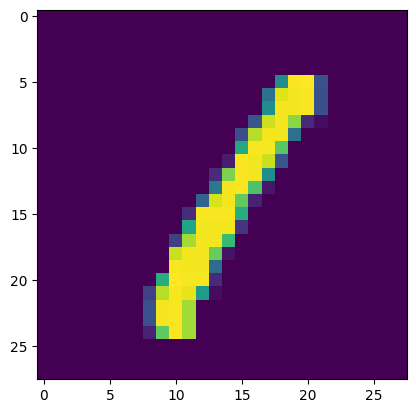

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])

In [10]:
x_train=x_train/255
x_test=x_test/255

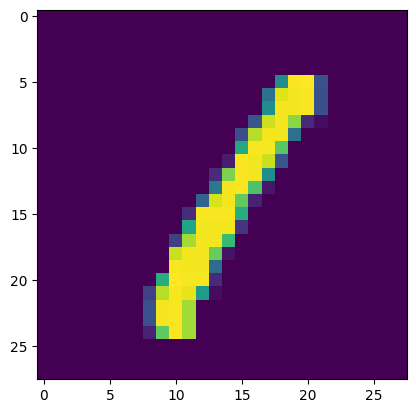

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])

In [12]:
x_test[0].shape

(28, 28)

In [13]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [15]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6794 - loss: 1.1415 - val_accuracy: 0.9063 - val_loss: 0.3377
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9076 - loss: 0.3385 - val_accuracy: 0.9224 - val_loss: 0.2722
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9226 - loss: 0.2726 - val_accuracy: 0.9329 - val_loss: 0.2374
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9304 - loss: 0.2445 - val_accuracy: 0.9393 - val_loss: 0.2122
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9394 - loss: 0.2105 - val_accuracy: 0.9439 - val_loss: 0.1945
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9456 - loss: 0.1885 - val_accuracy: 0.9492 - val_loss: 0.1796
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9510 - loss: 0.1709 - val_accuracy: 0.9522 - val_loss: 0.1669
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9554 - loss: 0.1565 - 

In [16]:
history.history

{'accuracy': [0.8128125071525574,
  0.9093124866485596,
  0.9240416884422302,
  0.9331458210945129,
  0.9402083158493042,
  0.9463750123977661,
  0.9511041641235352,
  0.9552708268165588,
  0.9588958621025085,
  0.9618333578109741,
  0.9649791717529297,
  0.9668958187103271,
  0.9696875214576721,
  0.9716249704360962,
  0.973562479019165,
  0.9745625257492065,
  0.9761458039283752,
  0.9774166941642761,
  0.9785000085830688,
  0.9797499775886536,
  0.981041669845581,
  0.9822083115577698,
  0.9828958511352539,
  0.9836041927337646,
  0.9845625162124634,
  0.9854583144187927,
  0.9864374995231628,
  0.9868541955947876,
  0.9878333210945129,
  0.9886041879653931,
  0.988937497138977,
  0.9900416731834412,
  0.9901041388511658,
  0.9907083511352539,
  0.9915000200271606,
  0.9916041493415833,
  0.991937518119812,
  0.9926666617393494,
  0.9934375286102295,
  0.9935833215713501,
  0.9936458468437195,
  0.9943541884422302,
  0.9947916865348816,
  0.9950624704360962,
  0.9957500100135803,
  

In [17]:
import pandas as pd

In [18]:
df=pd.DataFrame(history.history)

In [19]:
df['loss+accuracy']=df['loss']+df['accuracy']
df

,accuracy,loss,val_accuracy,val_loss,loss+accuracy
0,0.812813,0.697904,0.906333,0.337664,1.510717
1,0.909312,0.321541,0.922417,0.272243,1.230853
2,0.924042,0.267582,0.932917,0.237381,1.191624
3,0.933146,0.234050,0.939333,0.212158,1.167196
4,0.940208,0.208203,0.943917,0.194534,1.148411
5,0.946375,0.187448,0.949167,0.179558,1.133823
6,0.951104,0.170737,0.952167,0.166934,1.121841
7,0.955271,0.156260,0.954083,0.158885,1.111531
8,0.958896,0.144027,0.956500,0.149565,1.102923
9,0.961833,0.133437,0.959583,0.142742,1.095271


In [20]:
y_prob=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [21]:
y_pred=y_prob.argmax(axis=1)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9773

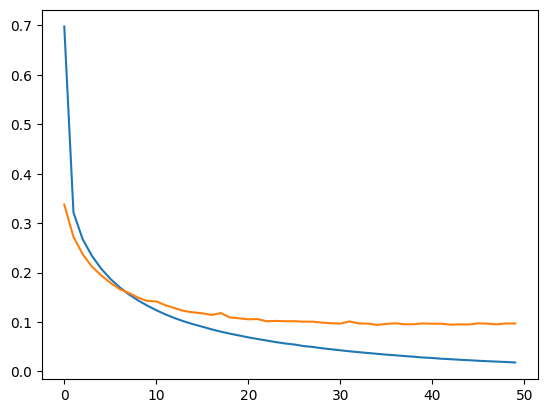

In [23]:
plt.plot(df['loss'])
plt.plot(df['val_loss'])

In [27]:
pred=model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [31]:
pred[0]

7

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

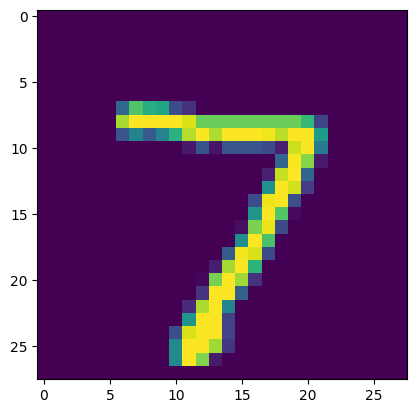

In [ ]:
plt.imshow(x_test[0])
plt.ylabel(pred)